### Data Cleaning

In [2]:
import pandas as pd

df = pd.read_csv("Housing_Data.csv")
df.head(10)

,price_lac,area_sqft,bhk,bathrooms,balconies,floors,furnishing_type,location,property_type
0,20.0,560.0,1,2.0,1,6,Unfurnished,Brahmavar,Apartment
1,20.0,600.0,1,1.0,1,4,Unfurnished,Doddanagudde,Apartment
2,20.0,600.0,1,1.0,1,4,Unfurnished,Doddanagudde,Apartment
3,12.0,605.0,2,2.0,1,4,Semi furnished,Indrali,Apartment
4,15.0,605.0,2,2.0,1,4,Semi furnished,Indrali,Apartment
5,19.0,605.0,2,2.0,0,1,Unfurnished,Indrali,Apartment
6,17.0,612.0,2,NaN,0,3,NaN,Indrali,Apartment
7,16.0,620.0,2,2.0,0,1,Furnished,Indrali,Apartment
8,12.0,650.0,2,2.0,1,4,Semi furnished,Indrali,Apartment
9,20.0,650.0,2,2.0,1,4,Semi furnished,Indrali,Apartment


In [3]:
df.describe()

,price_lac,area_sqft,bhk,bathrooms,balconies,floors
count,94.000000,92.000000,94.000000,91.000000,94.000000,94.000000
mean,56.486277,1908.065217,2.446809,2.252747,1.127660,3.882979
std,38.841617,1483.359528,0.862816,0.810945,0.870472,2.816451
min,12.000000,560.000000,1.000000,1.000000,0.000000,1.000000
25%,31.000000,1000.000000,2.000000,2.000000,0.000000,2.000000
50%,48.000000,1450.000000,2.000000,2.000000,1.000000,3.000000
75%,63.000000,2405.000000,3.000000,2.500000,2.000000,5.000000
max,180.000000,8720.000000,5.000000,5.000000,3.000000,12.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_lac        94 non-null     float64
 1   area_sqft        92 non-null     float64
 2   bhk              94 non-null     int64  
 3   bathrooms        91 non-null     float64
 4   balconies        94 non-null     int64  
 5   floors           94 non-null     int64  
 6   furnishing_type  92 non-null     object 
 7   location         94 non-null     object 
 8   property_type    94 non-null     object 
dtypes: float64(3), int64(3), object(3)
memory usage: 6.7+ KB


### Duplicate Value

In [5]:
df.duplicated().sum()

2

In [6]:
df.shape

(94, 9)

In [7]:
df = df.drop_duplicates()

In [8]:
#number of row after remove duplicate
df.shape

(92, 9)

### Missing Value

In [9]:
df.isnull().sum()

price_lac          0
area_sqft          2
bhk                0
bathrooms          3
balconies          0
floors             0
furnishing_type    2
location           0
property_type      0
dtype: int64

In [14]:
df['area_sqft'].fillna(df.area_sqft.mean(), inplace = True)
df['bathrooms'].fillna(df.bathrooms.mode()[0], inplace = True)
df['furnishing_type'].fillna(df.furnishing_type.mode()[0], inplace = True)

In [15]:
df.isnull().sum()

price_lac          0
area_sqft          0
bhk                0
bathrooms          0
balconies          0
floors             0
furnishing_type    0
location           0
property_type      0
dtype: int64

### Univariate Analysis

In [16]:
df.describe()

,price_lac,area_sqft,bhk,bathrooms,balconies,floors
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,57.159891,1927.688889,2.467391,2.260870,1.130435,3.891304
std,38.982087,1476.098337,0.857431,0.796553,0.879778,2.845689
min,12.000000,560.000000,1.000000,1.000000,0.000000,1.000000
25%,31.000000,1000.000000,2.000000,2.000000,0.000000,2.000000
50%,49.000000,1478.500000,2.000000,2.000000,1.000000,3.000000
75%,63.500000,2405.000000,3.000000,2.250000,2.000000,5.000000
max,180.000000,8720.000000,5.000000,5.000000,3.000000,12.000000


In [17]:
df.price_lac.mean()

57.15989130434782

In [18]:
df.price_lac.mode()

0    55.0
Name: price_lac, dtype: float64

In [19]:
df.price_lac.var()

1519.603082405638

In [21]:
df.price_lac.std()

38.98208668613877

In [22]:
df.price_lac.count()

92

### Data Visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

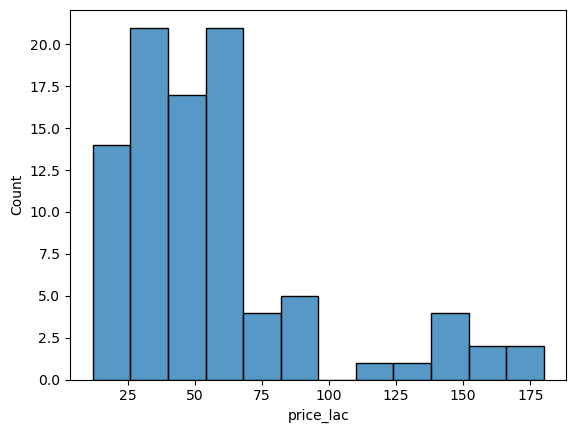

In [25]:
sns.histplot(x = 'price_lac', data =df)
plt.show()

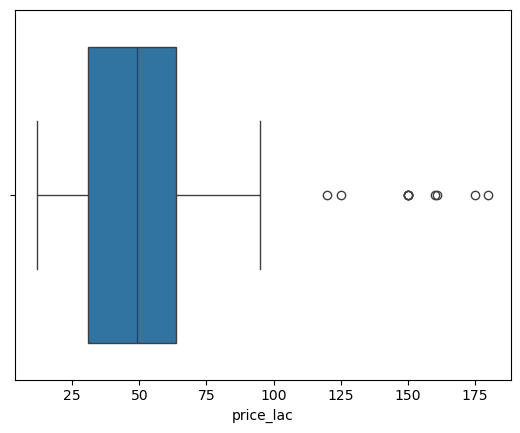

In [26]:
sns.boxplot(x = 'price_lac', data =df)
plt.show()

In [27]:
df.property_type.mode()[0]

'Apartment'

In [28]:
df.property_type.value_counts()

Apartment            53
Independent house    37
Builder floor         2
Name: property_type, dtype: int64

In [29]:
df.property_type.value_counts(normalize=True)

Apartment            0.576087
Independent house    0.402174
Builder floor        0.021739
Name: property_type, dtype: float64

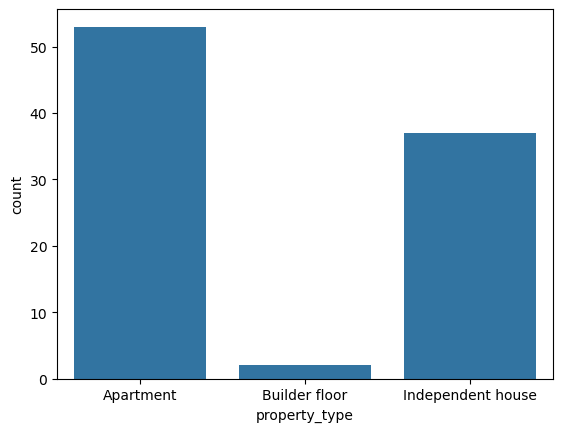

In [30]:
sns.countplot(data = df, x = 'property_type')
plt.show()